## Honey Berk, HW8

In [372]:
from __future__ import division
import nltk, re, pprint
from nltk import word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from nltk.book import *

## Corpus: "The Hound of the Baskervilles" by Sir Arthur Conan Doyle

In [373]:
import urllib2
url = 'http://www.gutenberg.org/files/2852/2852-0.txt'
response = urllib2.urlopen(url)
raw = response.read().decode('utf8')
type(raw)

unicode

In [374]:
tokens = word_tokenize(raw)
type(tokens)
len(tokens)
tokens[:10]

[u'\ufeffProject',
 u'Gutenberg\u2019s',
 u'The',
 u'Hound',
 u'of',
 u'the',
 u'Baskervilles',
 u',',
 u'by',
 u'A.']

In [375]:
raw.find("Chapter 1.")

742

In [376]:
raw.find("End of Project")

327270

In [377]:
raw = raw[742:327270]

In [378]:
raw.find("Chapter 1.")

0

In [379]:
text = nltk.Text(tokens)
type(text)

nltk.text.Text

In [380]:
tokens = word_tokenize(raw)
type(tokens)
len(tokens)
tokens[:10]

[u'Chapter',
 u'1',
 u'.',
 u'Mr.',
 u'Sherlock',
 u'Holmes',
 u'Mr.',
 u'Sherlock',
 u'Holmes',
 u',']

In [381]:
# Total words in text
len(text)

70259

In [382]:
texta = [w for w in text if w.isalpha() ]

In [383]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
textas = [w for w in texta if w.lower() not in stopwords]

In [384]:
# Sorted alpha words
sorted(set(textas))[0:10]

[u'ACTUAL',
 u'AGREE',
 u'AGREEMENT',
 u'AK',
 u'ANYTHING',
 u'Across',
 u'Additional',
 u'Address',
 u'Admiration',
 u'Africa']

In [385]:
# Number of alpha tokens
len(textas)

26449

## There are 5438 unique words in "The Hound of the Baskervilles" (excluding punctuation and stopwords)

In [386]:
# Distinct words
len(set(textas))

5818

In [387]:
# Half of total words in text
len(textas)*.5

13224.5

## 363 most common words make up 50% of total words in text (excluding punctuation and stopwords)

In [388]:
# Trial and error to find 50% mark
fdist = FreqDist(textas)
textas600 = pd.DataFrame(fdist.most_common(600), columns=['word','freq'])
textas600['relative frequency'] = textas600['freq']/(len(textas))
textas600['rank'] = list(range(1,601,1))
relfreq = sum(textas400[:363]['relative frequency'])
print relfreq

0.50016066838


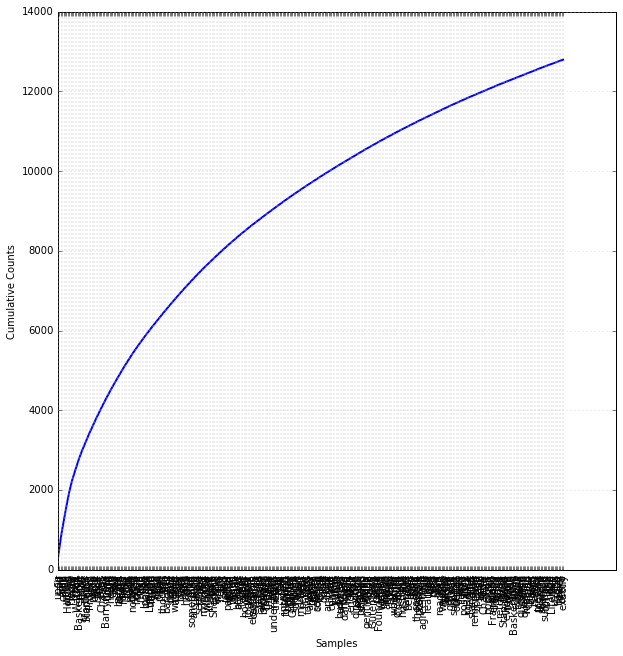

In [389]:
plt.figure(figsize=(10, 10))
fdist.plot(363, cumulative=True)

## 200 Highest Frequency Words in Corpus

In [390]:
textas200 = textas600[0:200]
top200 = list(textas200['word'])
print top200

[u'upon', u'Sir', u'said', u'one', u'could', u'man', u'would', u'Holmes', u'us', u'Henry', u'moor', u'know', u'may', u'see', u'Watson', u'Baskerville', u'must', u'sir', u'think', u'might', u'Mortimer', u'Stapleton', u'time', u'Project', u'two', u'much', u'face', u'come', u'back', u'came', u'last', u'eyes', u'Charles', u'say', u'Barrymore', u'long', u'night', u'old', u'heard', u'work', u'saw', u'way', u'tell', u'never', u'hound', u'death', u'case', u'away', u'friend', u'little', u'light', u'go', u'made', u'great', u'nothing', u'first', u'good', u'house', u'Hall', u'make', u'like', u'day', u'looked', u'matter', u'yet', u'round', u'London', u'turned', u'found', u'since', u'well', u'mind', u'seen', u'place', u'left', u'find', u'thought', u'also', u'baronet', u'still', u'name', u'doubt', u'told', u'help', u'without', u'asked', u'dark', u'ever', u'black', u'get', u'wife', u'hand', u'hands', u'give', u'side', u'far', u'something', u'shall', u'anything', u'right', u'knew', u'seemed', u'lay', u

In [391]:
print textas200

            word  freq  relative frequency  rank
0           upon   316            0.011948     1
1            Sir   244            0.009225     2
2           said   240            0.009074     3
3            one   216            0.008167     4
4          could   198            0.007486     5
5            man   196            0.007410     6
6          would   188            0.007108     7
7         Holmes   176            0.006654     8
8             us   175            0.006617     9
9          Henry   143            0.005407    10
10          moor   142            0.005369    11
11          know   116            0.004386    12
12           may   111            0.004197    13
13           see   110            0.004159    14
14        Watson   108            0.004083    15
15   Baskerville   105            0.003970    16
16          must    96            0.003630    17
17           sir    91            0.003441    18
18         think    85            0.003214    19
19         might    

(array([  0.,   0.,   0.,   0.,   0.,   0.,  33.,  28.,  12.,  21.,   9.,
         16.,  14.,   6.,   6.,   4.,   4.,   7.,   3.,   3.,   5.,   1.,
          5.,   1.,   4.,   0.,   1.,   1.,   0.,   0.,   1.,   2.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,
          0.,   0.,   2.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([ 0.     ,  0.00013,  0.00026,  0.00039,  0.00052,  0.00065,
         0.00078,  0.00091,  0.00104,  0.00117,  0.0013 ,  0.00143,
         0.00156,  0.00169,  0.00182,  0.00195,  0.00208,  0.00221,
         0.00234,  0.00247,  0.0026 ,  0.00273,  0.00286,  0.00299,
         0.00312,  0.00325,  0.00338,  0.00351

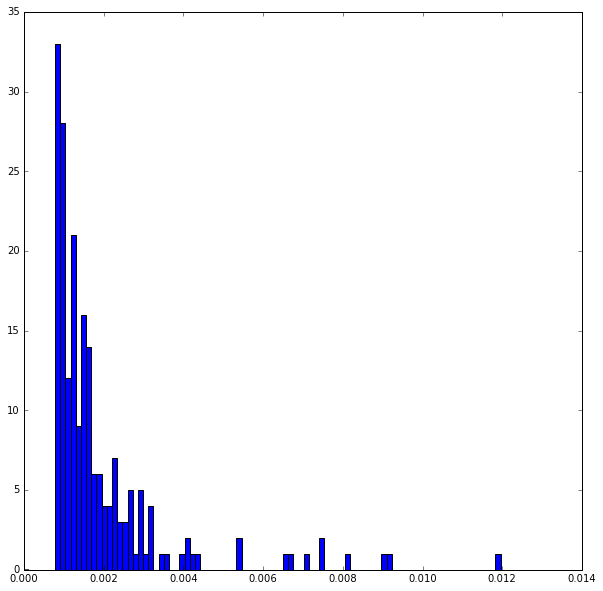

In [392]:
# Plot histogram for the top 200 words
plt.figure(figsize=(10, 10))
plt.hist(textas200['relative frequency'], bins=100, range=[0,.013])

## Relative Frequency Graph - Top 200 Words

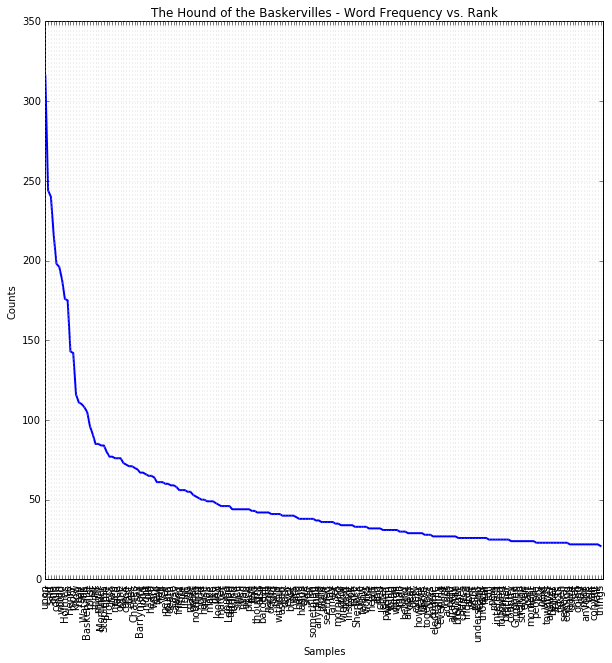

In [393]:
# Plot frequency of top 200 words
plt.figure(figsize=(10, 10))
plt.title('The Hound of the Baskervilles - Word Frequency vs. Rank')
fdist.plot(200)

## Log Log Graph of Top 200 Words

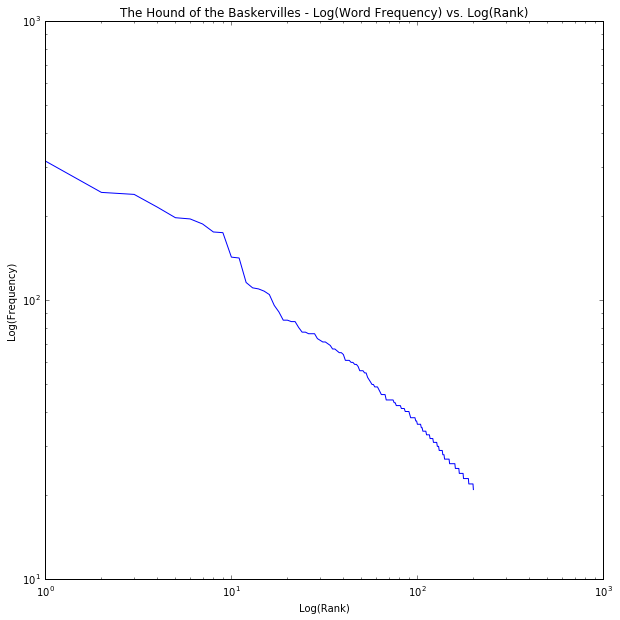

In [394]:
# Plot log log frequency of top 200 words
plt.figure(figsize=(10, 10))
plt.title('The Hound of the Baskervilles - Log(Word Frequency) vs. Log(Rank)')
x = textas600['rank'][0:200]
y = textas600['freq'][0:200]
plt.xlabel('Log(Rank)')
plt.ylabel('Log(Frequency)')
plt.loglog(x, y)

## Log log plot should be linear if this corpus abides by Zipf's law, but it is not. (Note this subset of the corpus excludes punctuation and stopwords.) The words in this corpus seem to differ from "all words in all corpora" in a few ways, including: 

## 1) There are a large number of proper nouns in the most frequent words, including Holmes, Henry, Baskerville, Watson and Mortimer.

## 2) The text was published in 1902 in the UK, so the language is likely reflective of that time and setting; to wit, the word "Sir" ranks second in frequency.

## 3) The top-ranked words, taken together, given an indication of the genre of this corpus (Detective Fiction); it would follow that any individual corpus would be skewed in this way, while the large set of "all words in all corpora" would basically serve to average out the top-ranked words, so that the full set of corpora would be more generic.